<font size="7">__Diabetes Health__</font>

In [2]:
### Importing LIbraries

In [3]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn. decomposition import PCA
from sklearn import preprocessing
from sklearn. preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import roc_curve
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier


In [4]:
## Reading the dataset

In [5]:
df=pd.read_csv("/Users/mrinalpatil/Desktop/wavelabs/diabetes.csv")

In [6]:
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [7]:
df.shape

(253680, 22)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [45]:
##Checking Null values

In [9]:
df.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [46]:
## Describing the date

In [10]:
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


<AxesSubplot:ylabel='Diabetes_012'>

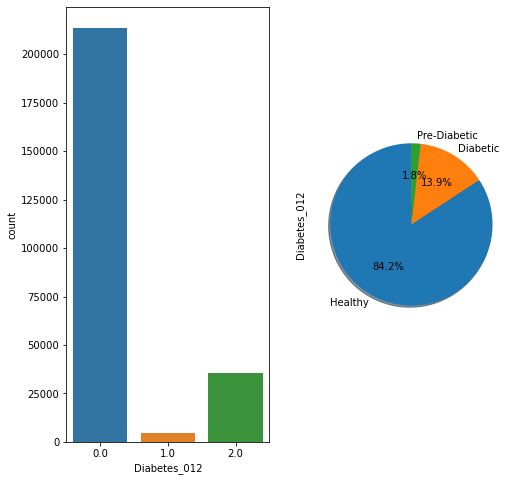

In [11]:
fig1, ax1 = plt.subplots(1,2,figsize=(8,8))

sns.countplot(df['Diabetes_012'],ax=ax1[0])

labels = 'Healthy','Diabetic', 'Pre-Diabetic'

df.Diabetes_012.value_counts().plot.pie(labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)

In [47]:
# Histogram 

array([[<AxesSubplot:title={'center':'Diabetes_012'}>,
        <AxesSubplot:title={'center':'HighBP'}>,
        <AxesSubplot:title={'center':'HighChol'}>,
        <AxesSubplot:title={'center':'CholCheck'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'Smoker'}>,
        <AxesSubplot:title={'center':'Stroke'}>,
        <AxesSubplot:title={'center':'HeartDiseaseorAttack'}>,
        <AxesSubplot:title={'center':'PhysActivity'}>,
        <AxesSubplot:title={'center':'Fruits'}>],
       [<AxesSubplot:title={'center':'Veggies'}>,
        <AxesSubplot:title={'center':'HvyAlcoholConsump'}>,
        <AxesSubplot:title={'center':'AnyHealthcare'}>,
        <AxesSubplot:title={'center':'NoDocbcCost'}>,
        <AxesSubplot:title={'center':'GenHlth'}>],
       [<AxesSubplot:title={'center':'MentHlth'}>,
        <AxesSubplot:title={'center':'PhysHlth'}>,
        <AxesSubplot:title={'center':'DiffWalk'}>,
        <AxesSubplot:title={'center':'Sex'}>,
        <A

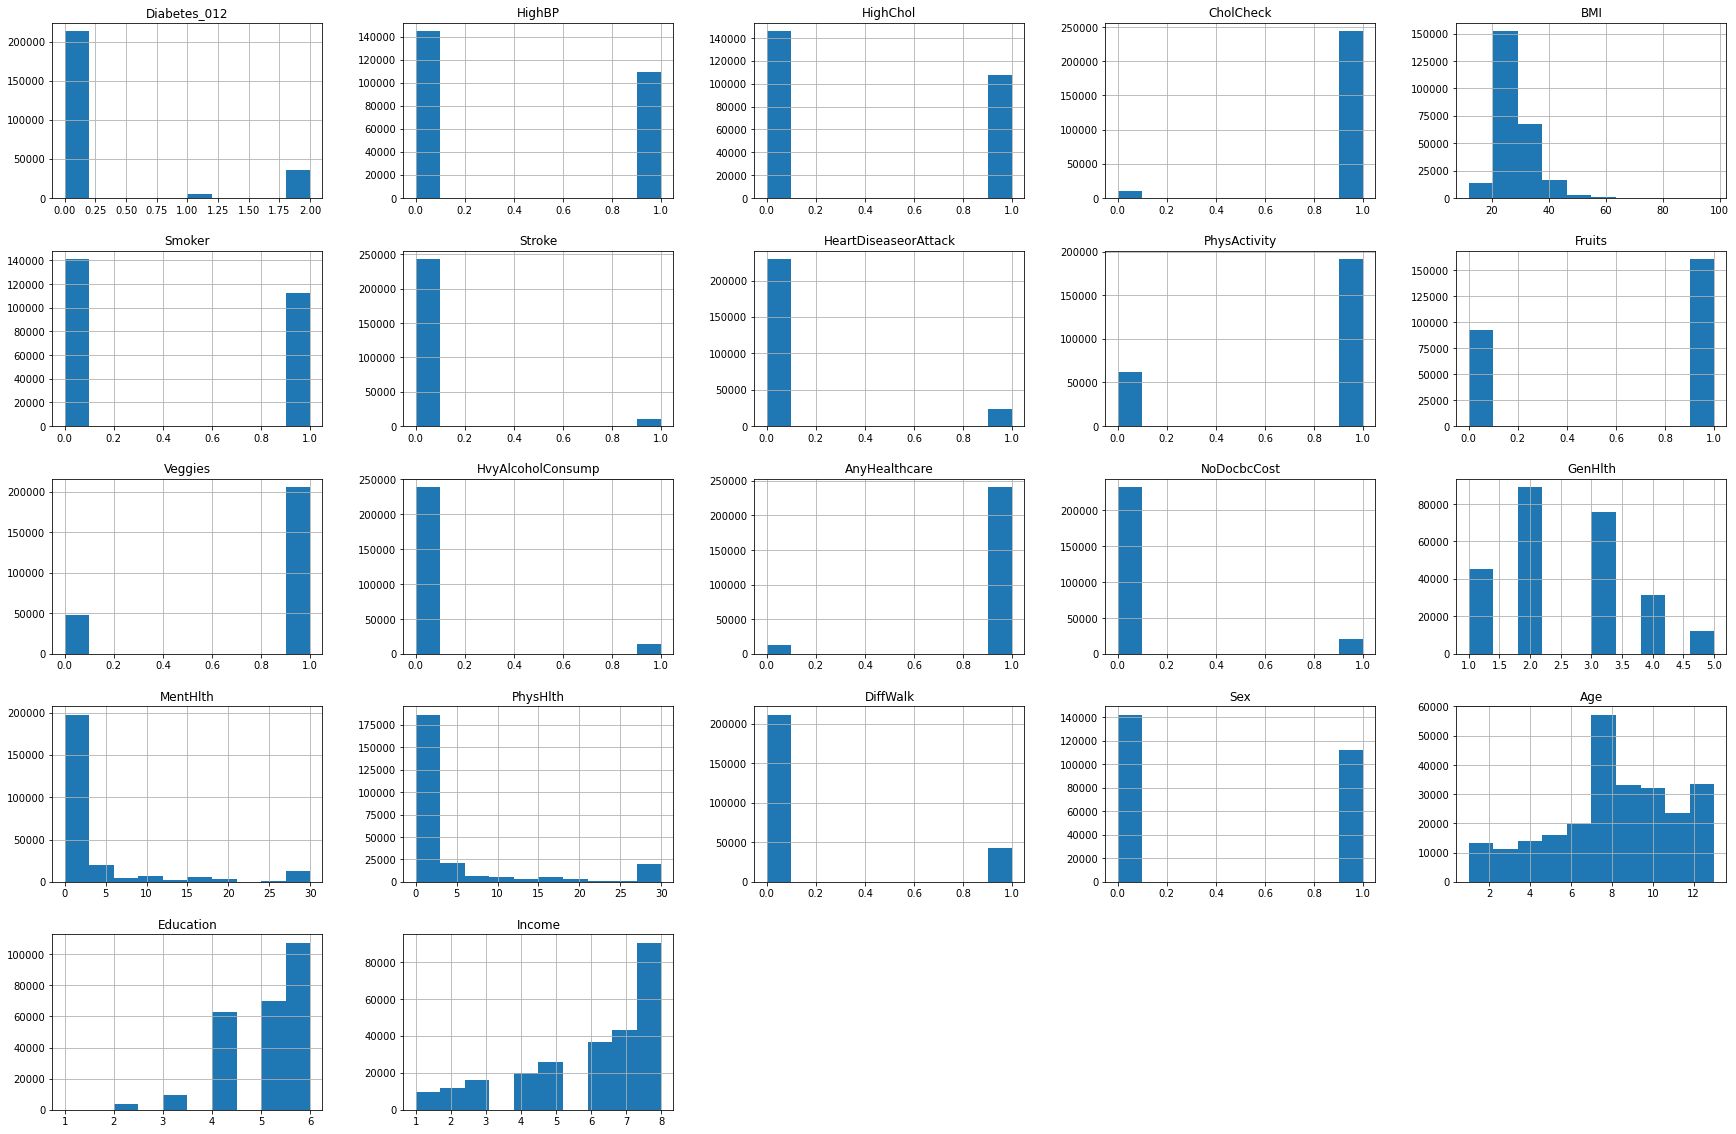

In [48]:
df.hist(figsize=(30,20))

In [49]:
### Correlation

In [13]:
df_corr = df.corr()
df_corr

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_012,1.000000,0.271596,0.209085,0.067546,0.224379,0.062914,0.107179,0.180272,-0.121947,-0.042192,...,0.015410,0.035436,0.302587,0.073507,0.176287,0.224239,0.031040,0.185026,-0.130517,-0.171483
HighBP,0.271596,1.000000,0.298199,0.098508,0.213748,0.096991,0.129575,0.209361,-0.125267,-0.040555,...,0.038425,0.017358,0.300530,0.056456,0.161212,0.223618,0.052207,0.344452,-0.141358,-0.171235
HighChol,0.209085,0.298199,1.000000,0.085642,0.106722,0.091299,0.092620,0.180765,-0.078046,-0.040859,...,0.042230,0.013310,0.208426,0.062069,0.121751,0.144672,0.031205,0.272318,-0.070802,-0.085459
CholCheck,0.067546,0.098508,0.085642,1.000000,0.034495,-0.009929,0.024158,0.044206,0.004190,0.023849,...,0.117626,-0.058255,0.046589,-0.008366,0.031775,0.040585,-0.022115,0.090321,0.001510,0.014259
BMI,0.224379,0.213748,0.106722,0.034495,1.000000,0.013804,0.020153,0.052904,-0.147294,-0.087518,...,-0.018471,0.058206,0.239185,0.085310,0.121141,0.197078,0.042950,-0.036618,-0.103932,-0.100069
Smoker,0.062914,0.096991,0.091299,-0.009929,0.013804,1.000000,0.061173,0.114441,-0.087401,-0.077666,...,-0.023251,0.048946,0.163143,0.092196,0.116460,0.122463,0.093662,0.120641,-0.161955,-0.123937
Stroke,0.107179,0.129575,0.092620,0.024158,0.020153,0.061173,1.000000,0.203002,-0.069151,-0.013389,...,0.008776,0.034804,0.177942,0.070172,0.148944,0.176567,0.002978,0.126974,-0.076009,-0.128599
HeartDiseaseorAttack,0.180272,0.209361,0.180765,0.044206,0.052904,0.114441,0.203002,1.000000,-0.087299,-0.019790,...,0.018734,0.031000,0.258383,0.064621,0.181698,0.212709,0.086096,0.221618,-0.099600,-0.141011
PhysActivity,-0.121947,-0.125267,-0.078046,0.004190,-0.147294,-0.087401,-0.069151,-0.087299,1.000000,0.142756,...,0.035505,-0.061638,-0.266186,-0.125587,-0.219230,-0.253174,0.032482,-0.092511,0.199658,0.198539
Fruits,-0.042192,-0.040555,-0.040859,0.023849,-0.087518,-0.077666,-0.013389,-0.019790,0.142756,1.000000,...,0.031544,-0.044243,-0.103854,-0.068217,-0.044633,-0.048352,-0.091175,0.064547,0.110187,0.079929


In [50]:
## Plotting correlation matrix

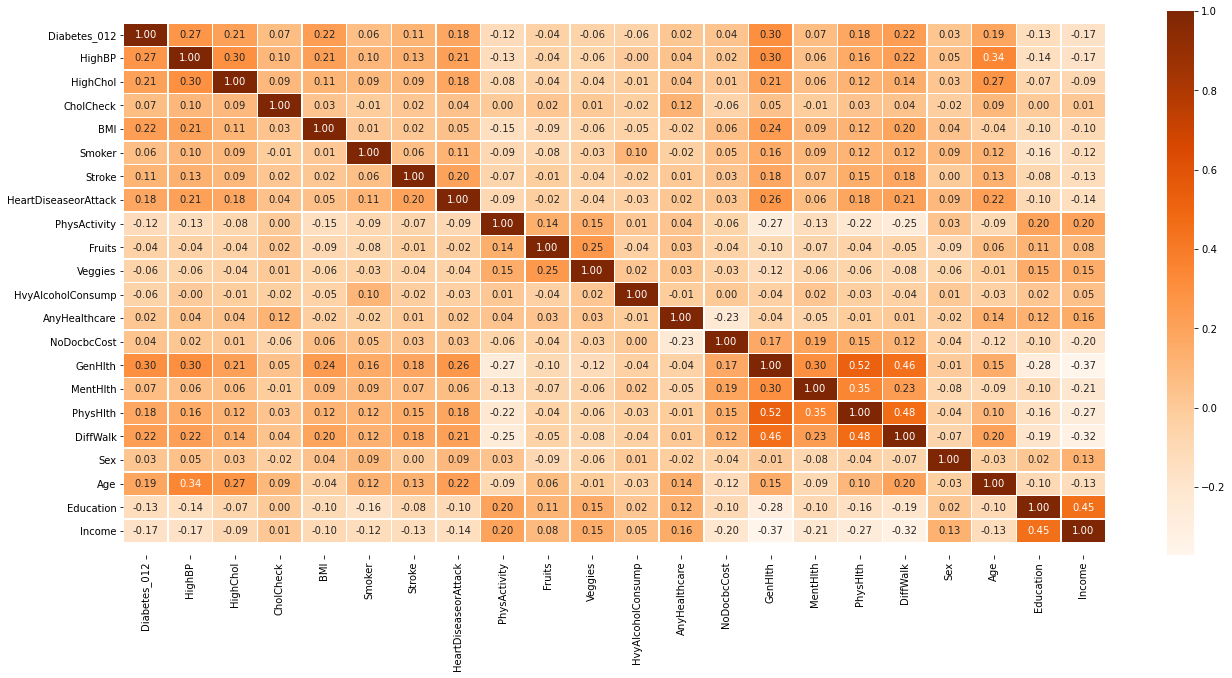

In [14]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(22, 10))
ax = sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="Oranges");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

In [35]:
Diabetes = df['Diabetes_012'].replace({0.0:'Healthy', 1.0:'Pre-diabetic', 2.0:'Diabetic'})

In [15]:
##Age vs Diabetes

In [36]:
pd.crosstab(Diabetes, df["Age"])

Age,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
Diabetes_012,,,,,,,,,,,,,
Diabetic,78,140,314,626,1051,1742,3088,4263,5733,6558,5141,3403,3209
Healthy,5601,7404,10737,13055,14943,17765,22808,26019,26809,24939,17790,12132,13701
Pre-diabetic,21,54,72,142,163,312,418,550,702,697,602,445,453


In [38]:
pd.DataFrame(df.groupby(Diabetes).count()["Age"])

,Age
Diabetes_012,
Diabetic,35346
Healthy,213703
Pre-diabetic,4631


In [39]:
##Smoker vs Diabetes

Text(0.5, 1.0, 'Diabetes Frequency for Smoker')

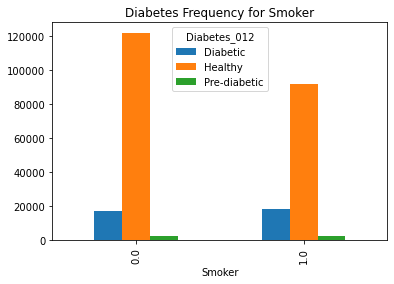

In [40]:
pd.crosstab(df.Smoker, Diabetes).plot(kind = 'bar')
plt.title("Diabetes Frequency for Smoker")

In [42]:
pd.DataFrame(df.groupby(Diabetes).count()["Smoker"])

,Smoker
Diabetes_012,
Diabetic,35346
Healthy,213703
Pre-diabetic,4631


In [51]:
### Distribution diabetes

<AxesSubplot:title={'center':'Label Distribution'}>

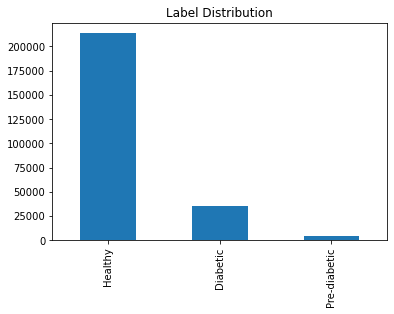

In [52]:
Diabetes.value_counts().plot(kind = 'bar', title = 'Label Distribution')

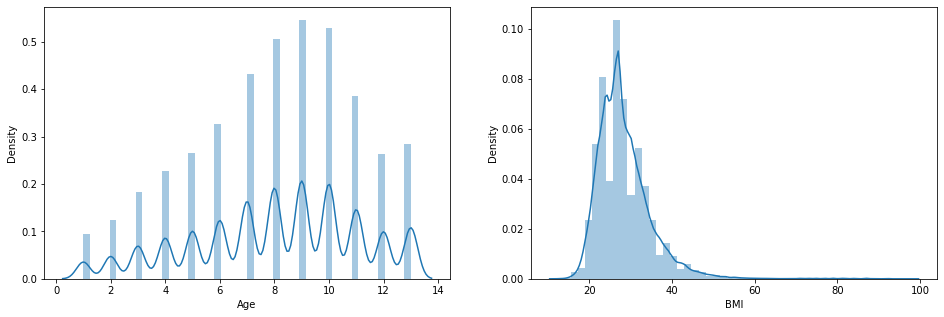

In [53]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['Age'])
plt.subplot(1,2,2)
sns.distplot(df['BMI'])
plt.subplot(1,2,2)

plt.show()

In [54]:
## Splitting into x and y

In [55]:
y=df['Diabetes_012']
X=df.drop('Diabetes_012',axis=1)

In [56]:
## Splitting into training and testing data 

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
## Importing counters to check the balance of training data
from collections import Counter

In [21]:
counter = Counter(y_train)
print(counter)

Counter({0.0: 170908, 2.0: 28349, 1.0: 3687})


In [22]:
###The data is unbalanced 

In [23]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [24]:
pip install -v scikit-learn

Using pip 21.0.1 from /Users/mrinalpatil/opt/anaconda3/lib/python3.8/site-packages/pip (python 3.8)
Non-user install because site-packages writeable
Created temporary directory: /private/var/folders/qy/4jhthtwd6k93s_0z90hq4cl00000gn/T/pip-ephem-wheel-cache-qfdgt992
Created temporary directory: /private/var/folders/qy/4jhthtwd6k93s_0z90hq4cl00000gn/T/pip-req-tracker-614edz_8
Initialized build tracking at /private/var/folders/qy/4jhthtwd6k93s_0z90hq4cl00000gn/T/pip-req-tracker-614edz_8
Created build tracker: /private/var/folders/qy/4jhthtwd6k93s_0z90hq4cl00000gn/T/pip-req-tracker-614edz_8
Entered build tracker: /private/var/folders/qy/4jhthtwd6k93s_0z90hq4cl00000gn/T/pip-req-tracker-614edz_8
Created temporary directory: /private/var/folders/qy/4jhthtwd6k93s_0z90hq4cl00000gn/T/pip-install-pfmw3woh
Created temporary directory: /private/var/folders/qy/4jhthtwd6k93s_0z90hq4cl00000gn/T/pip-unpack-wm5g8lqr
Removed build tracker: '/private/var/folders/qy/4jhthtwd6k93s_0z90hq4cl00000gn/T/pip-req

In [25]:
from sklearn.metrics import DistanceMetric

In [26]:
# transform the unbalanced training dataset into a balanced data by using Smote
from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state=33)
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [27]:
counter= Counter(y_train)
print(counter)

Counter({0.0: 170908, 2.0: 170908, 1.0: 170908})


In [28]:
## Now the data is perfectly balanced

In [29]:
### Scaling the data by using standard scaler

In [30]:
sc = StandardScaler()

# Fitting Standard Scaller
X_train = sc.fit_transform(X_train)

# Scaling data
X_test = sc.transform(X_test)

In [31]:
## Hyperparameter tuning

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
grid_models = [(LogisticRegression(),[{'C':[0.25,0.5,0.75,1],'random_state':[0]}]), 
               (GaussianNB(),[{'var_smoothing': [1e-09]}]), 
               (DecisionTreeClassifier(),[{'criterion':['gini','entropy'],'random_state':[0]}]), 
               (RandomForestClassifier(),[{'n_estimators':[100,150,200],'criterion':['gini','entropy'],'random_state':[0]}])
            ]

In [34]:
for i,j in grid_models:
    grid = GridSearchCV(estimator=i,param_grid = j, scoring = 'accuracy',cv=2)
    grid.fit(X_train, y_train)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    print('{}:\nBest Accuracy : {:.2f}%'.format(i,best_accuracy*100))
    print('Best Parameters : ',best_param)
    print('')
    print('----------------')
    print('')

LogisticRegression():
Best Accuracy : 53.18%
Best Parameters :  {'C': 0.25, 'random_state': 0}

----------------

GaussianNB():
Best Accuracy : 51.85%
Best Parameters :  {'var_smoothing': 1e-09}

----------------

DecisionTreeClassifier():
Best Accuracy : 84.22%
Best Parameters :  {'criterion': 'entropy', 'random_state': 0}

----------------

RandomForestClassifier():
Best Accuracy : 90.49%
Best Parameters :  {'criterion': 'gini', 'n_estimators': 200, 'random_state': 0}

----------------

